<a href="https://colab.research.google.com/github/rohitjha-git/rohitjha-git-Plant-Diseases-detection/blob/test/Plant_Diseases_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

zip_file_path = "/content/drive/MyDrive/archive.zip"
extract_dir = "/content"


# Check if the zip file exists
if os.path.exists(zip_file_path):
    try:
        # Create a ZipFile object
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            # Extract all contents to the specified directory
            zip_ref.extractall(extract_dir)
        print(f"Successfully extracted '{zip_file_path}' to '{extract_dir}'")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}' is not a valid zip file.")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"Error: '{zip_file_path}' does not exist.")

Successfully extracted '/content/drive/MyDrive/archive.zip' to '/content'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import glob
import cv2
import tensorflow as tf

In [ ]:
train='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'

In [ ]:
size=224
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(train,
                      batch_size=164,
                      target_size=(size,size),
                      subset="training",
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=True)

Found 63282 images belonging to 38 classes.


In [ ]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

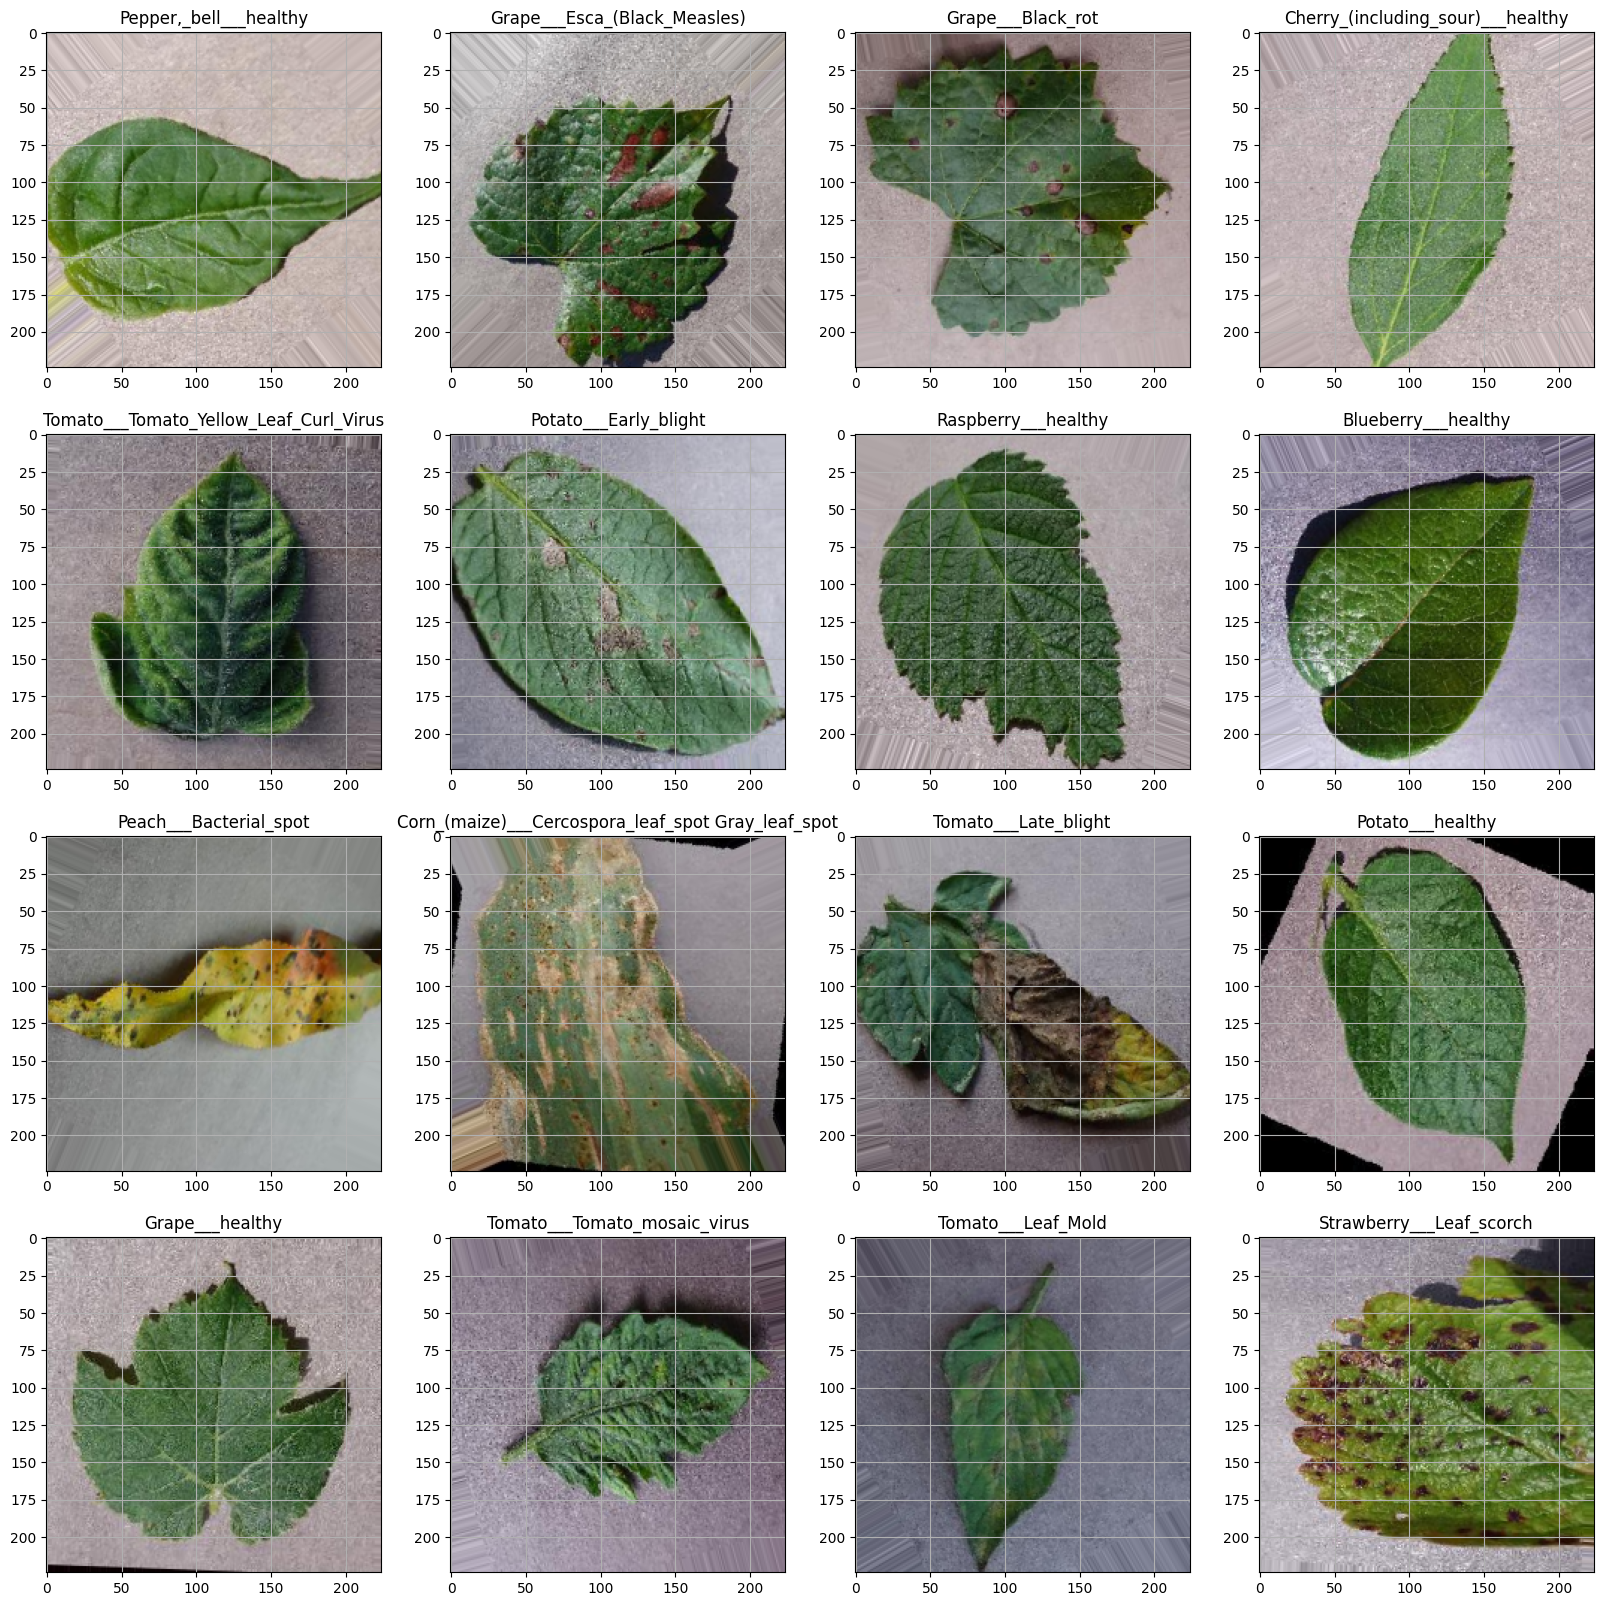

In [ ]:
#let's display some images from training set

classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])   # when y is categorical
        # plt.title(classes[int(y_batch[i])])   # when y is binary or sparse
        plt.grid(None)
    # show the plot
    plt.show()
    break


In [ ]:
valid='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [ ]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(valid,
                      batch_size=164,
                      target_size=(224,224),
                      subset='validation',
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=False)

Found 1742 images belonging to 38 classes.


In [ ]:
test='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
).flow_from_directory(test,
                      batch_size=164,
                      target_size=(224,224),
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=False)

Found 17572 images belonging to 38 classes.


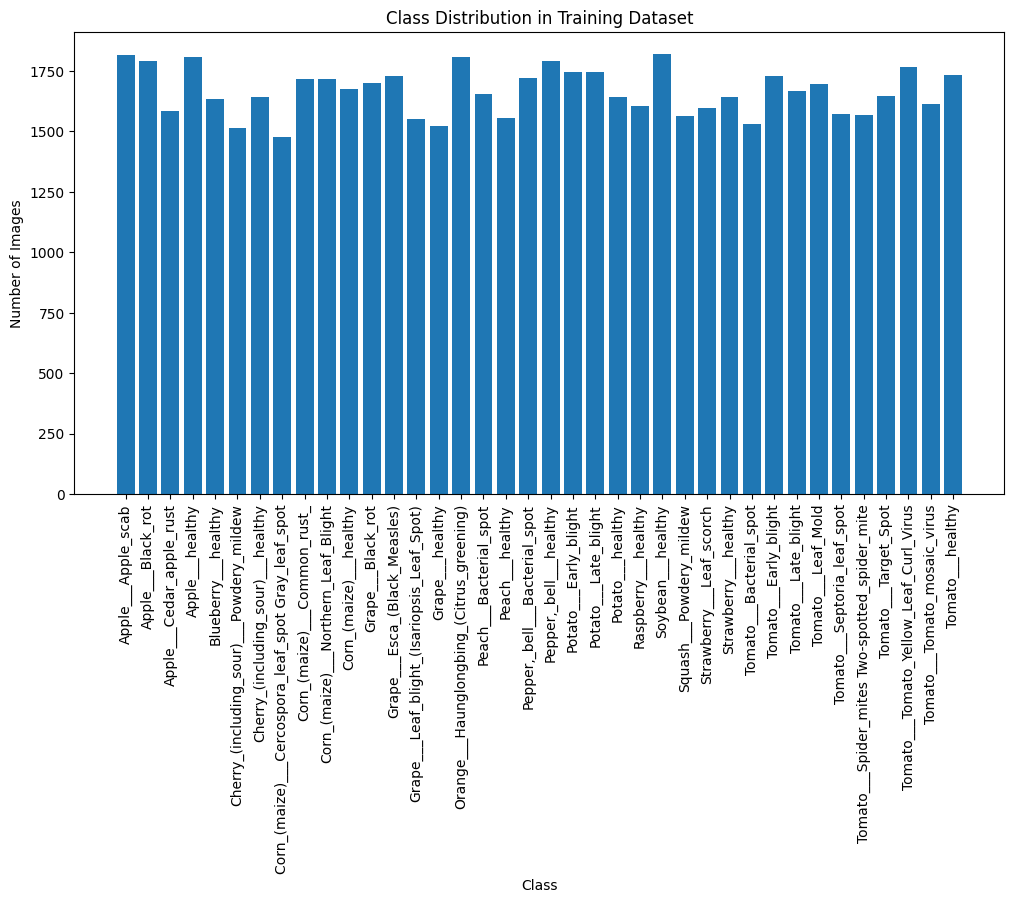

In [ ]:
# Count the number of images per class in the training set
class_counts = train_generator.classes
class_labels = list(train_generator.class_indices.keys())

# Count occurrences of each class
class_distribution = pd.Series(class_counts).value_counts().sort_index()

# Display class distribution
plt.figure(figsize=(12,6))
plt.bar(class_distribution.index, class_distribution.values, tick_label=class_labels)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Training Dataset')
plt.xticks(rotation=90)
plt.show()

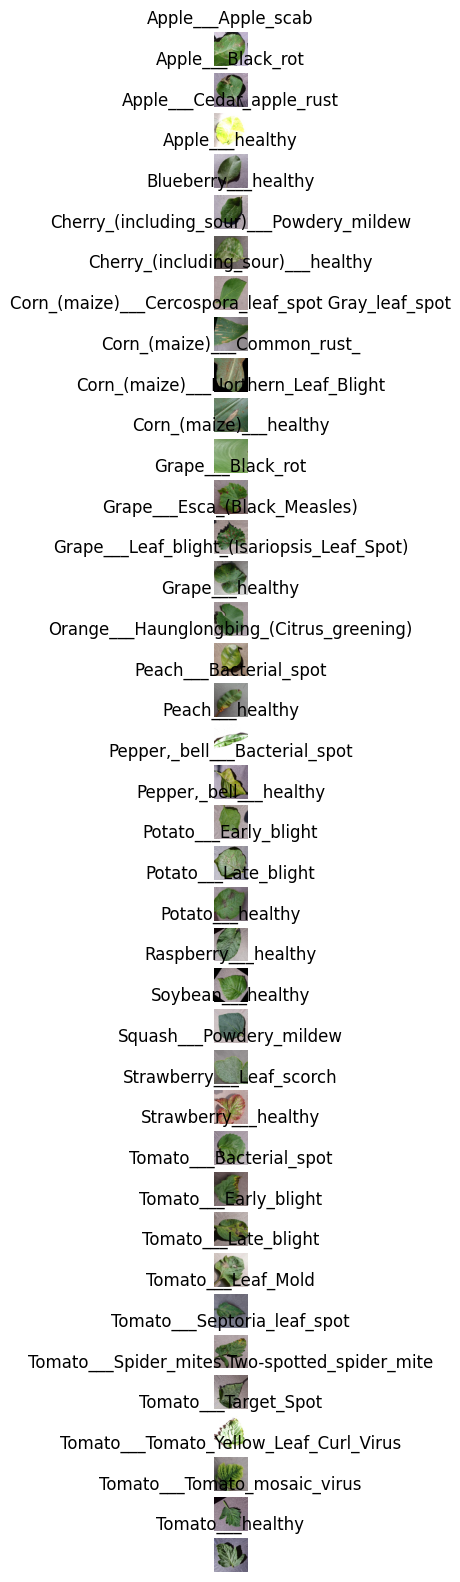

In [ ]:
# Plot some example images from each class in the dataset

classes = list(train_generator.class_indices.keys())

plt.figure(figsize=(20, 20))
for i, class_name in enumerate(classes):
    # Get a batch of images from the generator
    for X_batch, y_batch in train_generator:
        # Find the index of the current class
        class_idx = train_generator.class_indices[class_name]
        # Get the first image from the batch that belongs to this class
        idx = np.where(y_batch[:, class_idx] == 1)[0][0]
        img = X_batch[idx]
        # Plot the image
        plt.subplot(len(classes), 5, i * 5 + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
        break

plt.show()

In [ ]:
# Check the shape of images in the training dataset
image_shapes = []
for X_batch, y_batch in train_generator:
    image_shapes.append(X_batch.shape[1:])  # Shape of images (height, width, channels)
    break  # Exit after the first batch

# Show the shape of images in the dataset
print(f"Image shape: {image_shapes[0]}")

Image shape: (224, 224, 3)


In [ ]:
# Check the number of channels in the images
sample_image = X_batch[0]  # Take the first image in the batch
channels = sample_image.shape[2]
print(f"Number of color channels in images: {channels}")

Number of color channels in images: 3


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get class names
class_names = list(train_generator.class_indices.keys())

# Initialize a dictionary to store counts for each class
class_counts = {class_name: 0 for class_name in class_names}

# Iterate through the generator to count samples for each class
for X_batch, y_batch in train_generator:  # Iterate through batches
    for y in y_batch:
        class_index = np.argmax(y)  # Get the index of the class

        # Check if class_index is within the range of class_names
        if class_index < len(class_names):
            class_name = class_names[class_index]
            class_counts[class_name] += 1
        else:
            print(f"Warning: class_index {class_index} out of range for class_names (length: {len(class_names)}). Skipping this sample.")

# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xticks(rotation=90)
plt.title("Class Distribution in Training Dataset")
plt.xlabel("Disease Type")
plt.ylabel("Number of Images")
plt.show()